# **Multi-layer Perceptron**


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', # 64 is the number of neurons
                          input_shape=(X_train.shape[1],)), # Input layer # shape[1] is the number of features
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer # 32 is the number of neurons and relu is the activation function
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']) # mae is used to mearure error and adam is the optimizer

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1) # epocs are the number of times the model will see the entire dataset

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 10.0233 - mae: 2.8904
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 7.9436 - mae: 2.5174
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 6.2423 - mae: 2.1600
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 4.7169 - mae: 1.8022
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 3.3892 - mae: 1.4640
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 2.4345 - mae: 1.1947
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 1.7512 - mae: 1.0129
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 1.4568 - mae: 0.9351
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3432 - mae: 0.8956
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 1.2902 - mae: 0.8893
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2212

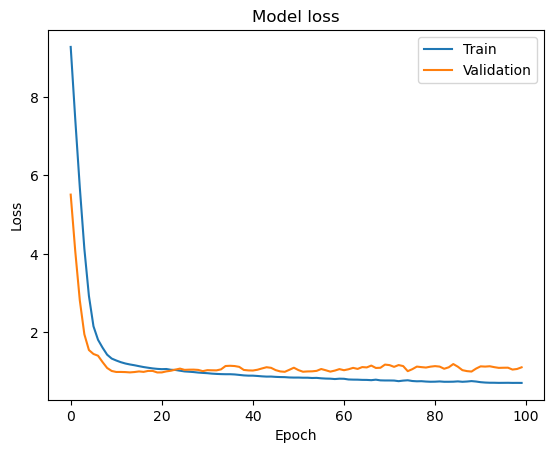

In [3]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Assignment:** what is a Validation Set? or validation loss?

---

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 2s 75ms/step - loss: 11.7643 - val_loss: 6.9563
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 9.1900 - val_loss: 5.1015
Epoch 3/100
7/7 [==============================] - 0s 33ms/step - loss: 6.9767 - val_loss: 3.5696
Epoch 4/100
7/7 [==============================] - 0s 68ms/step - loss: 5.0304 - val_loss: 2.3854
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 3.4545 - val_loss: 1.6069
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 2.3524 - val_loss: 1.2299
Epoch 7/100
7/7 [==============================] - 0s 29ms/step - loss: 1.6303 - val_loss: 1.1730
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 1.3585 - val_loss: 1.2954
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 1.2914 - val_loss: 1.3910
Epoch 10/100
7/7 [==============================] - 0s 25ms/step - loss: 1.2301 - val_loss: 1.3275
Epoch 11/100
7/7 [

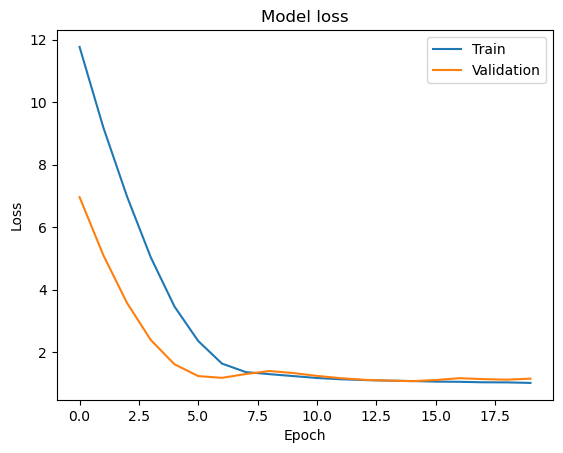

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()